In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pro_solvers import solve_heat
plt.rcParams["figure.figsize"] = (5, 3)  # width x height in inches
from matplotlib.animation import FuncAnimation
from manim import *
from manim.utils.ipython_magic import ManimMagic
get_ipython().register_magics(ManimMagic)

%load_ext manim

C:\Users\robrahm\Anaconda3\lib\site-packages\manim\__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Manim Community v0.17.3

The manim module is not an IPython extension.


In [69]:
# PDE: u_t = alpha u_xx
alpha = 2.0
L = 1.0
dx = 0.01
dt = 0.0001
t_end = 0.05  # Try varying this

# Initial condition: sin(3 pi x)
#u0 = lambda x: np.sin(3 * np.pi * x) + 1
#u0 = lambda x: x**2
#u0 = lambda x : np.where(np.sin(100*x) > 0.0, 1.0, 0.0)
#u0 = lambda x: np.where(np.abs(x) < .1, 100.0, 0.0)

N = 100
C = np.random.rand(N)
def u0(x):
    u = 0
    k = 0
    while k < N:
        u += C[k]*np.cos(k * np.pi * x) / (k+1)
        k += 1
    return u + 1

u0 = lambda x: 10*np.exp(-100*(x-.5)**2)
# Exact solution
def u_exact(x, t):
    return np.exp(-18 * np.pi**2 * t) * np.sin(3 * np.pi * x)
"""
def u_exact(x, t):
    u = 0
    k = 0
    while k < N:
        u += C[k] * np.exp(-(k) * (k) * np.pi**2 * t * alpha) * np.cos(k * np.pi * x) / (k+1)
        k += 1
    return u + 1
"""

T, U = solve_heat(u0, alpha, dx, dt, t_end, L)

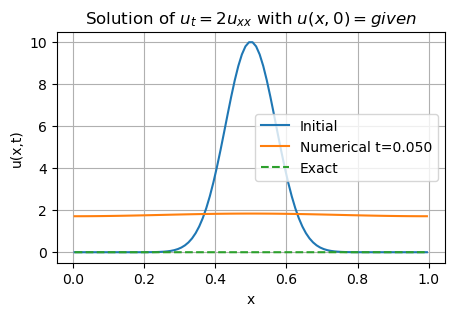

In [70]:
x = np.linspace(dx/2, L - dx/2, int(L/dx))  # FiPy's cell centers

plt.plot(x, U[0], label='Initial')
plt.plot(x, U[-1], label=f'Numerical t={t_end:.3f}')
plt.plot(x, u_exact(x, t_end), '--', label='Exact')

plt.title("Solution of $u_t = 2u_{xx}$ with $u(x,0)=given$")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)
plt.show()

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


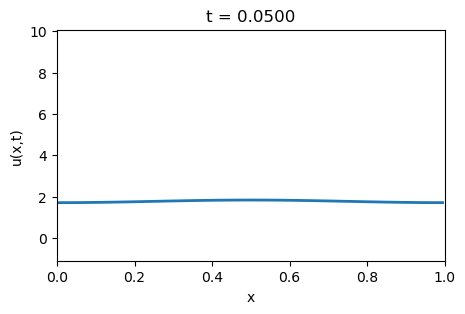

In [71]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, L)
ax.set_ylim(-1.1, np.max(U) + .1)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Heat Equation Animation")

def init():
    line.set_data([], [])
    return (line,)

def update(frame):
    line.set_data(x, U[frame])
    ax.set_title(f"t = {T[frame]:.4f}")
    return (line,)

ani = FuncAnimation(fig, update, frames=len(T), init_func=init, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())